<a href="https://colab.research.google.com/github/assiou349/DS_Case-Study/blob/main/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

In [11]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500, 6), 0)

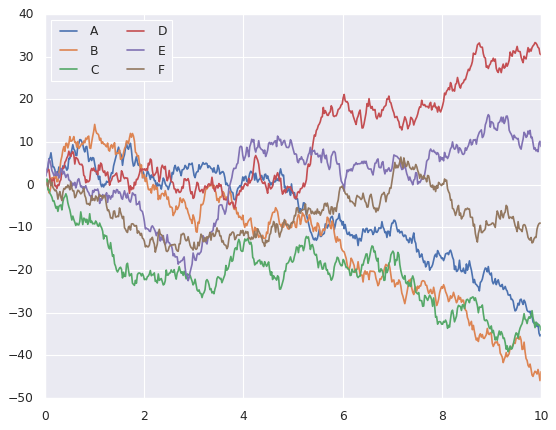

In [12]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [13]:
import seaborn as sns
sns.set()

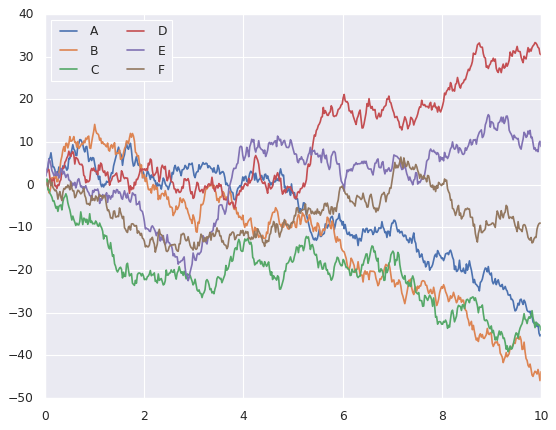

In [16]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

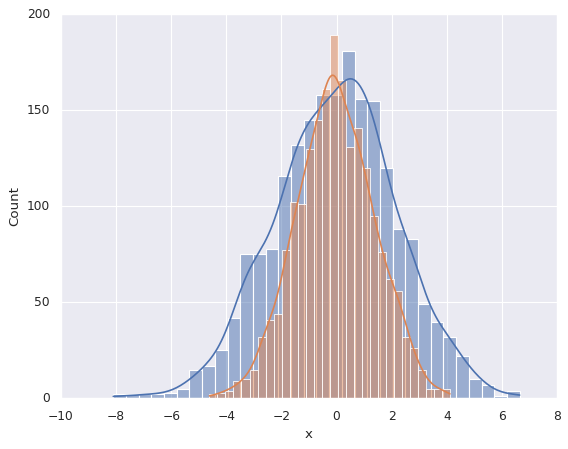

In [26]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
  sns.histplot(data[col], kde=True)

/tmp/ipython-input-3313311836.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
/tmp/ipython-input-3313311836.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


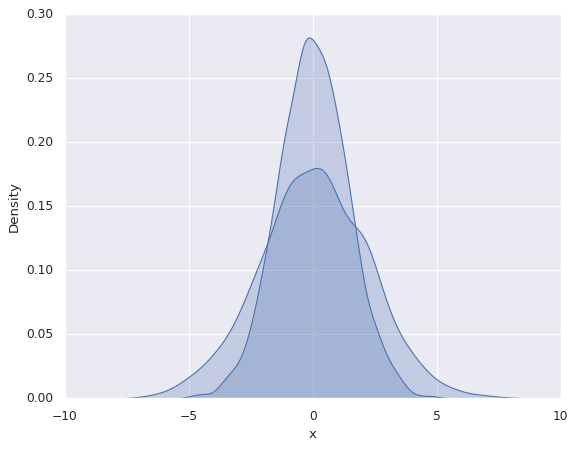

In [21]:
from numpy._core.fromnumeric import shape
for col in 'xy':
  sns.kdeplot(data[col], shade=True)

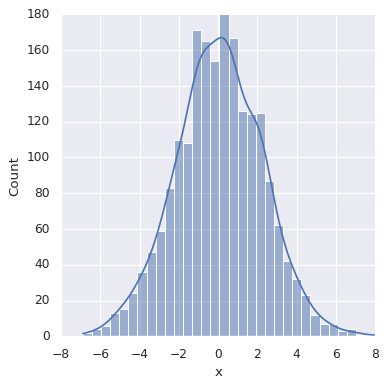

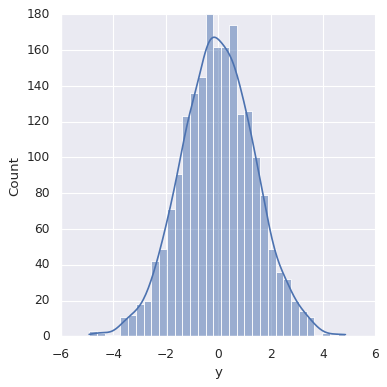

In [25]:
sns.displot(data['x'], kde=True)
sns.displot(data['y'], kde=True)

<Axes: ylabel='Density'>

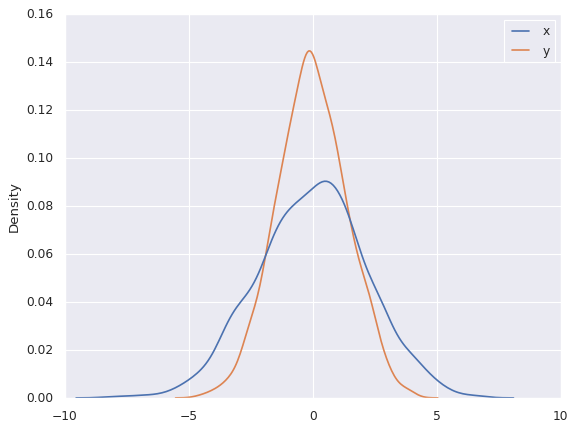

In [27]:
sns.kdeplot(data)

In [28]:
data

,x,y
0,-1.762108,0.624630
1,4.533351,2.267453
2,4.114487,1.919124
3,-1.955773,-0.729572
4,-3.267008,-0.227979
...,...,...
1995,-3.534769,-0.501760
1996,-3.624191,-2.443186
1997,0.341861,1.344812
1998,0.456371,-0.926975


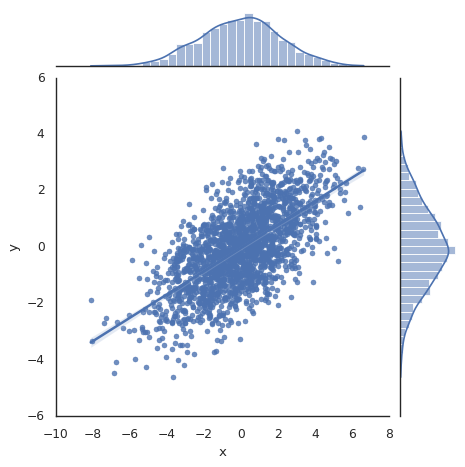

In [45]:
with sns.axes_style('white'):
  sns.jointplot(x='x',y='y',data=data, kind='reg')

In [35]:
iris = sns.load_dataset("iris")

In [36]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


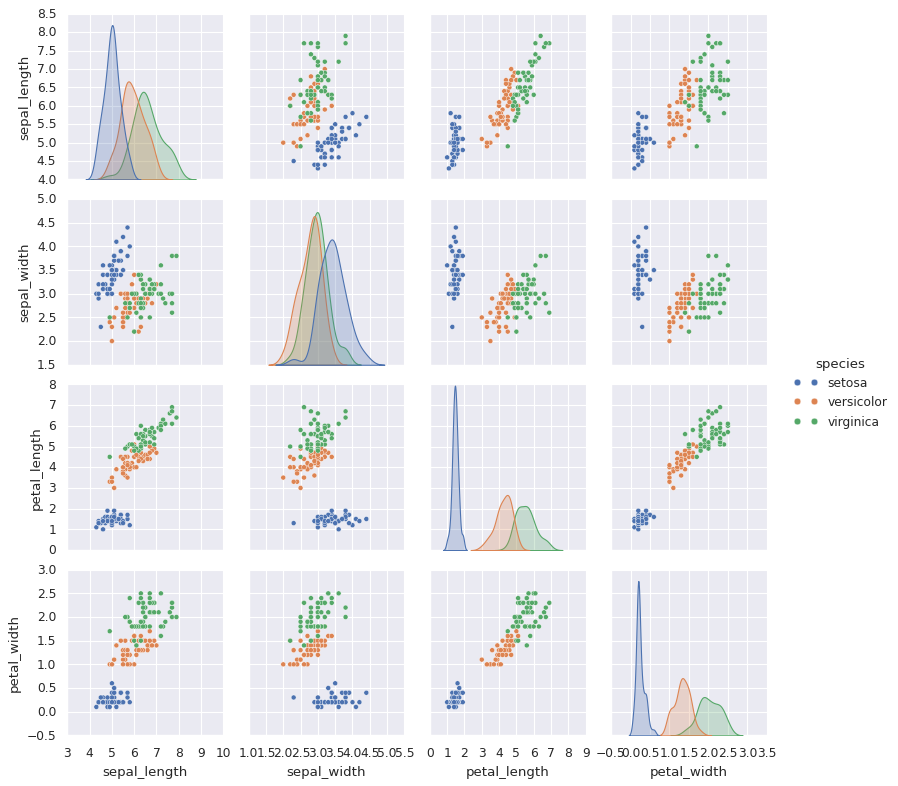

In [37]:
sns.pairplot(iris, hue='species', size=2.5)

In [38]:
tips = sns.load_dataset('tips')

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

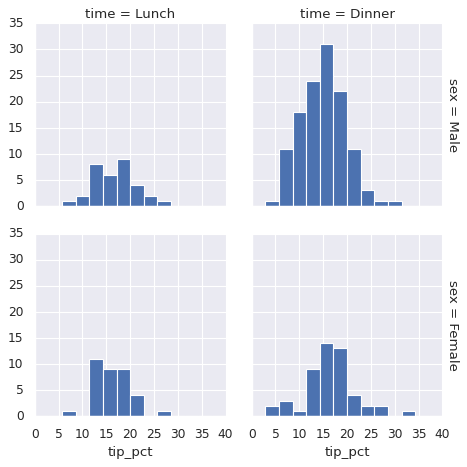

In [42]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins = np.linspace(0, 40, 15))

In [44]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [48]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  2080k      0 --:--:-- --:--:-- --:--:-- 2086k


In [49]:
data = pd.read_csv('marathon-data.csv')


In [50]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [51]:
data.dtypes

,0
age,int64
gender,object
split,object
final,object


In [54]:
def convert_time(s):
  h, m, s = map(int, s.split(':'))
  return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [55]:
data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})

In [56]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [57]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [58]:
data.dtypes

,0
age,int64
gender,object
split,timedelta64[ns]
final,timedelta64[ns]


In [59]:
data['split_sec'] = data['split'].astype(int) /1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


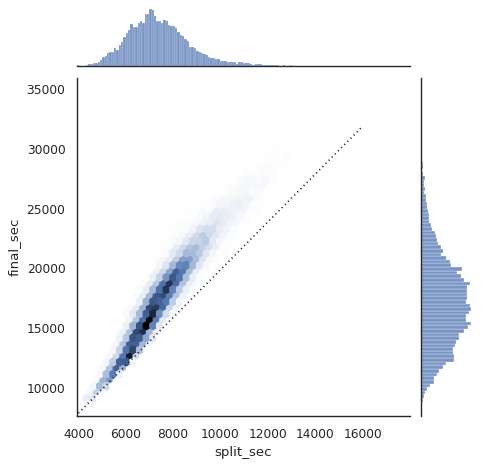

In [61]:
with sns.axes_style('white'):
  g = sns.jointplot(x = 'split_sec', y = 'final_sec', data=data, kind='hex')
  g.ax_joint.plot(np.linspace(4000,16000), np.linspace(8000, 32000), ':k')

In [62]:
data['split_frac'] = 1 -2 * data['split_sec'] / data['final_sec']

In [63]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


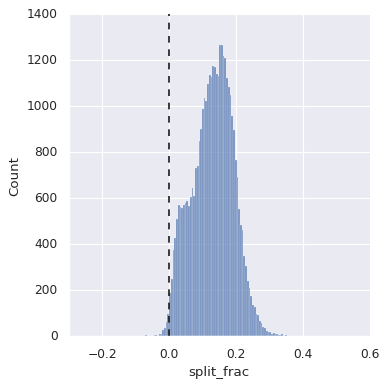

In [69]:
from matplotlib.lines import lineStyles
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle='--')

In [70]:
sum(data.split_frac<0)

251

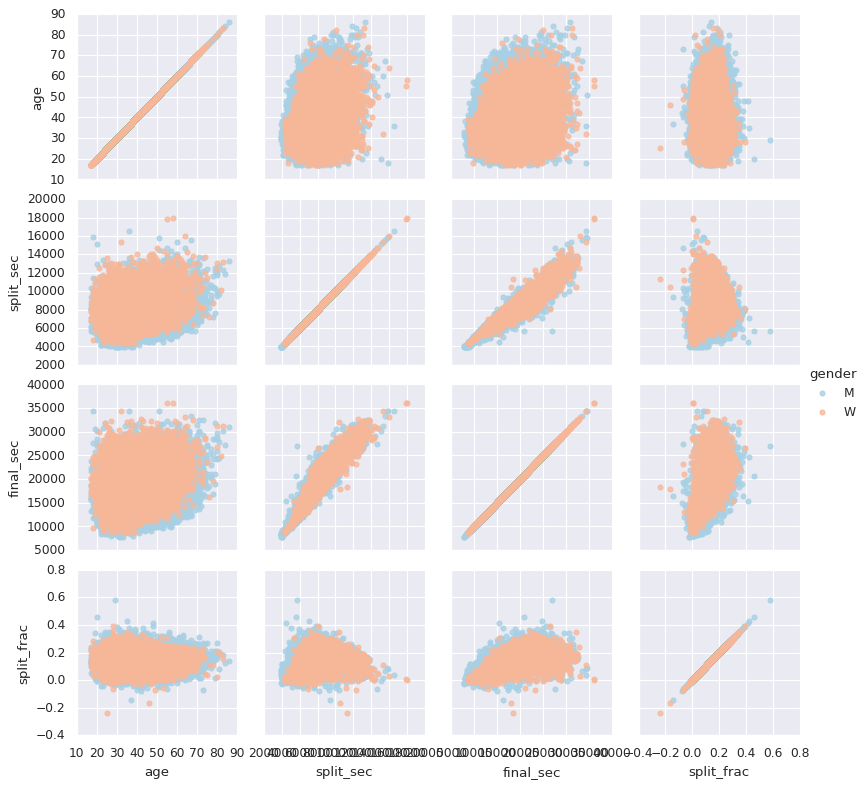

In [73]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

<Axes: xlabel='split_frac', ylabel='Density'>

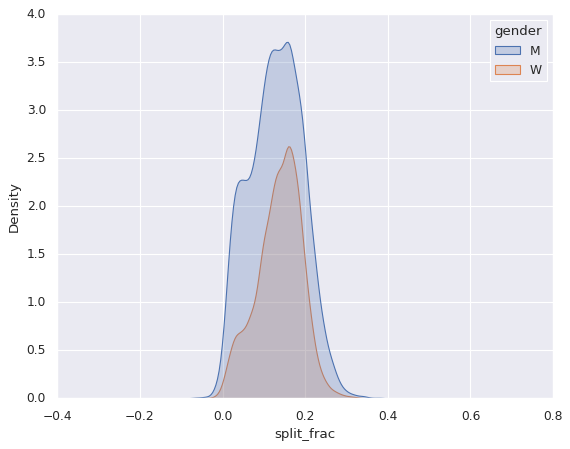

In [77]:
sns.kdeplot(data=data, x='split_frac', hue='gender', fill=True)

/tmp/ipython-input-4069500608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="gender", y="split_frac", palette=["lightblue", "lightpink"])


<Axes: xlabel='gender', ylabel='split_frac'>

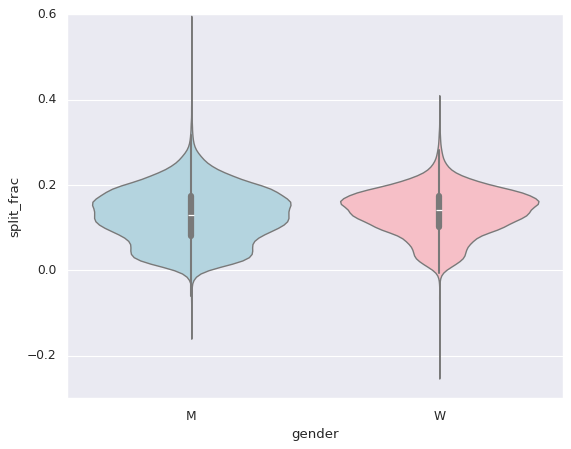

In [79]:
sns.violinplot(data=data, x="gender", y="split_frac", palette=["lightblue", "lightpink"])

In [80]:
data['age_dec'] = data.age.map(lambda age: 10 * (age //10))

In [81]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


In [91]:
(data['age'] > 80).sum()

np.int64(7)

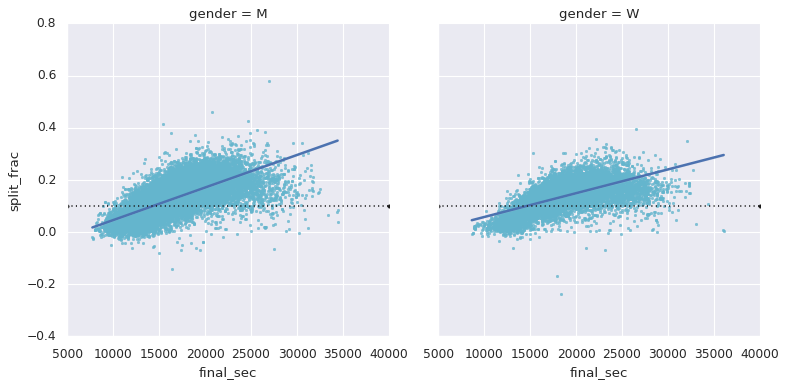

In [96]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")